## Project: Telco Customer Churn Prediction

### 1. Load & Inspect Data
Goal: Understanding the structure and getting ready for cleaning

In [19]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

# Basic overview
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-n

In [20]:
print("\n First 5 Rows:")
df.head()


 First 5 Rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
#summary of numeric columns
print("\n Descriptive Statistics (Numeric):")
df.describe()


 Descriptive Statistics (Numeric):


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [22]:
# Object (categorical) columns
print("\n Categorical Columns:")
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)


 Categorical Columns:
Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [23]:
# Numeric columns
print("\n Numeric Columns:")
num_cols = df.select_dtypes(include='number').columns
print(num_cols)


 Numeric Columns:
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


In [24]:
# Missing values
print("\n Null Values:")
print(df.isnull().sum())


 Null Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [25]:
# Duplicates
print("\n Duplicate Rows:", df.duplicated().sum())


 Duplicate Rows: 0


### 2. Data Cleaning & Preprocessing

In [26]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

In [27]:
# Check where 'TotalCharges' has missing values
missing_tc = df[df['TotalCharges'].isnull()]
print("Rows with missing TotalCharges:")
print(missing_tc)

# Convert 'TotalCharges' to numeric (force errors to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing 'TotalCharges'
df = df.dropna(subset=['TotalCharges'])

Rows with missing TotalCharges:
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [28]:
#  Convert 'SeniorCitizen' from 0/1 to Yes/No
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})

#  Reset index after drops
df = df.reset_index(drop=True)

# Final data check
print("\n Cleaned dataset shape:", df.shape)
print(" Remaining nulls:\n", df.isnull().sum())


 Cleaned dataset shape: (7032, 21)
 Remaining nulls:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [29]:
# Using One-Hot Encoding for Nominal Categorical Columns
# Identify categorical features (excluding target)
cat_cols = df.select_dtypes(include='object').columns.drop('Churn')
print("Categorical columns:\n", cat_cols)

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True) #drop_first=True: avoids dummy variable trap (perfect multicollinearity)

Categorical columns:
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [30]:
# Create new tenure groups
def tenure_group(tenure):
    if tenure <= 12:
        return '0-12 Months'
    elif tenure <= 24:
        return '12-24 Months'
    elif tenure <= 48:
        return '24-48 Months'
    elif tenure <= 60:
        return '48-60 Months'
    else:
        return '60+ Months'

df_encoded['tenure_group'] = df['tenure'].apply(tenure_group)

# One-hot encode new feature
df_encoded = pd.get_dummies(df_encoded, columns=['tenure_group'], drop_first=True)

print(" Final encoded shape:", df_encoded.shape)
print(" Sample data:\n", df_encoded.head())

 Final encoded shape: (7032, 7066)
 Sample data:
    tenure  MonthlyCharges  TotalCharges Churn  customerID_0003-MKNFE  \
0       1           29.85         29.85    No                  False   
1      34           56.95       1889.50    No                  False   
2       2           53.85        108.15   Yes                  False   
3      45           42.30       1840.75    No                  False   
4       2           70.70        151.65   Yes                  False   

   customerID_0004-TLHLJ  customerID_0011-IGKFF  customerID_0013-EXCHZ  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0013-MHZWF  customerID_0013-SMEOE  ...  Contract_One year 

####  Summary of Cleaning Steps

To ensure the dataset was analysis-ready, the following cleaning and preprocessing steps were applied:

1. **Column Standardization**  
   - Stripped extra whitespaces from column names.

2. **Missing Value Handling**  
   - Converted `TotalCharges` to numeric (some values were empty strings).  
   - Dropped rows where `TotalCharges` was missing (`NaN` after conversion).

3. **Data Type Adjustments**  
   - Replaced `SeniorCitizen` values (`0` and `1`) with readable categories: `'No'` and `'Yes'`.

4. **Duplicate Removal**  
   - Removed any duplicate rows and reset the index.

5. **Categorical Encoding**  
   - Applied One-Hot Encoding to all categorical features (excluding the target `Churn`).  
   - Used `drop_first=True` to avoid multicollinearity.

6. **Feature Engineering**  
   - Created a new feature: `tenure_group`, categorizing customers into bins based on tenure length:  
     `0–12`, `12–24`, `24–48`, `48–60`, `60+` months.  
   - One-hot encoded the `tenure_group` feature.

7. **Final Output**  
   - The final cleaned and encoded dataset is stored as `df_encoded`, ready for modeling.

### 3. Exploratory Data Analysis (EDA)
Goal: Find patterns that may drive churn

#### Question 1: What proportion of customers have churned compared to those who stayed?

C:\Users\YOGA\AppData\Local\Temp\ipykernel_2012\3559480835.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


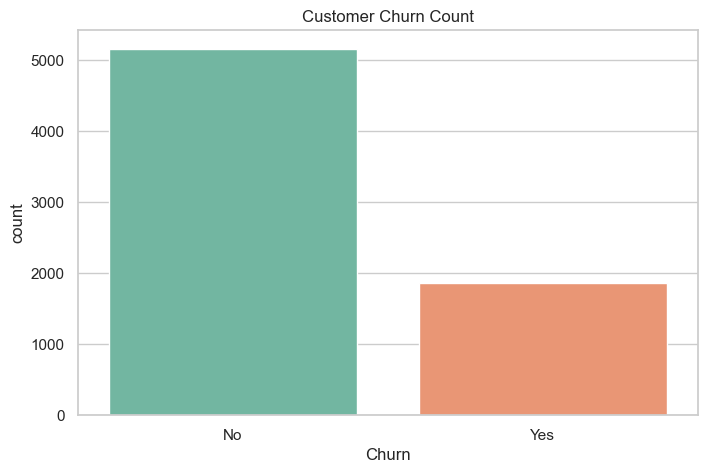

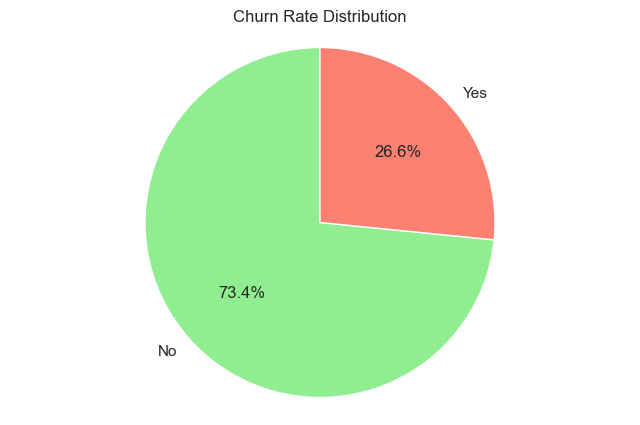

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)

#  Churn Count
churn_counts = df['Churn'].value_counts()
plt.figure()
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title("Customer Churn Count")
plt.show()

# Pie chart for churn %
plt.figure()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'salmon'], startangle=90)
plt.title("Churn Rate Distribution")
plt.axis('equal')
plt.show()

#### Question 2: Does the type of contract (Month-to-month, One year, Two year) influence the likelihood of churn?

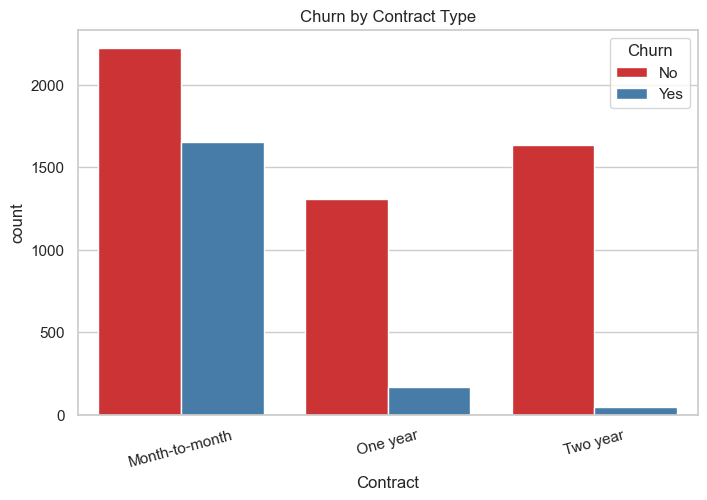

In [32]:
#  Churn by Contract Type
plt.figure()
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set1')
plt.title('Churn by Contract Type')
plt.xticks(rotation=15)
plt.show()

#### Question 3: Are customers with certain types of internet service (DSL, Fiber optic, None) more likely to churn?

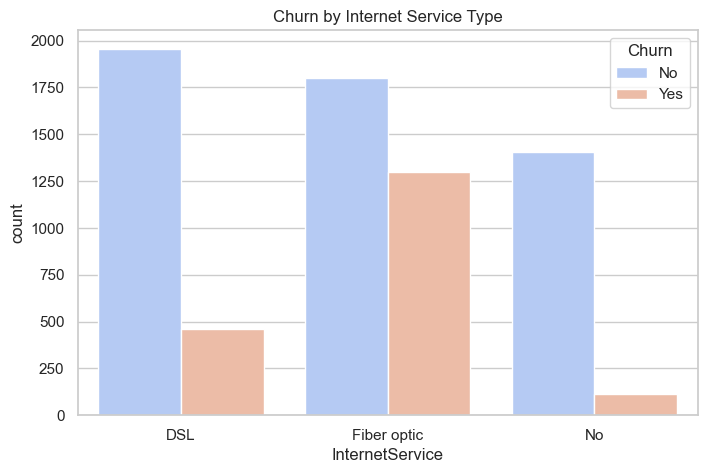

In [33]:
#  Churn by Internet Service
plt.figure()
sns.countplot(data=df, x='InternetService', hue='Churn', palette='coolwarm')
plt.title('Churn by Internet Service Type')
plt.show()

#### Question 4: Is there a significant difference in churn behavior between male and female customers?

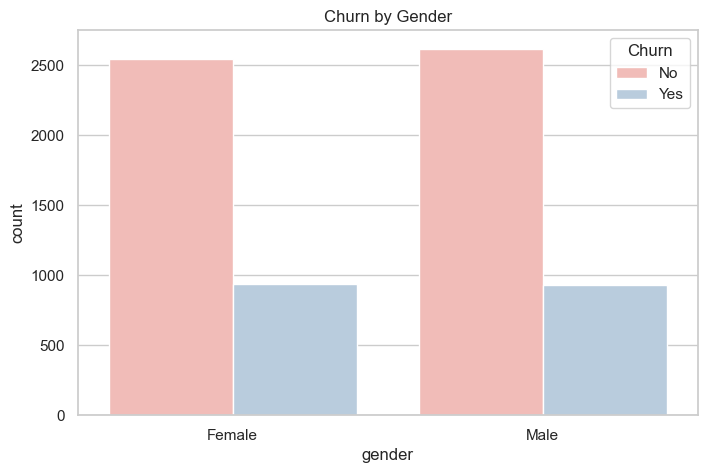

In [34]:
# Churn by Gender
plt.figure()
sns.countplot(data=df, x='gender', hue='Churn', palette='Pastel1')
plt.title('Churn by Gender')
plt.show()

#### Question 5: Are customers with shorter tenure more likely to churn compared to long-term users?

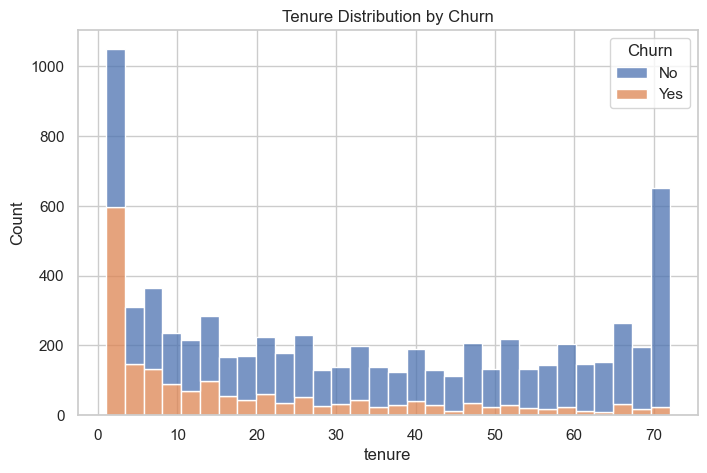

In [35]:
#  Tenure Distribution by Churn
plt.figure()
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, multiple='stack')
plt.title('Tenure Distribution by Churn')
plt.show()

#### Question 6: Which numerical features (e.g., MonthlyCharges, tenure, TotalCharges) are most strongly correlated with churn?

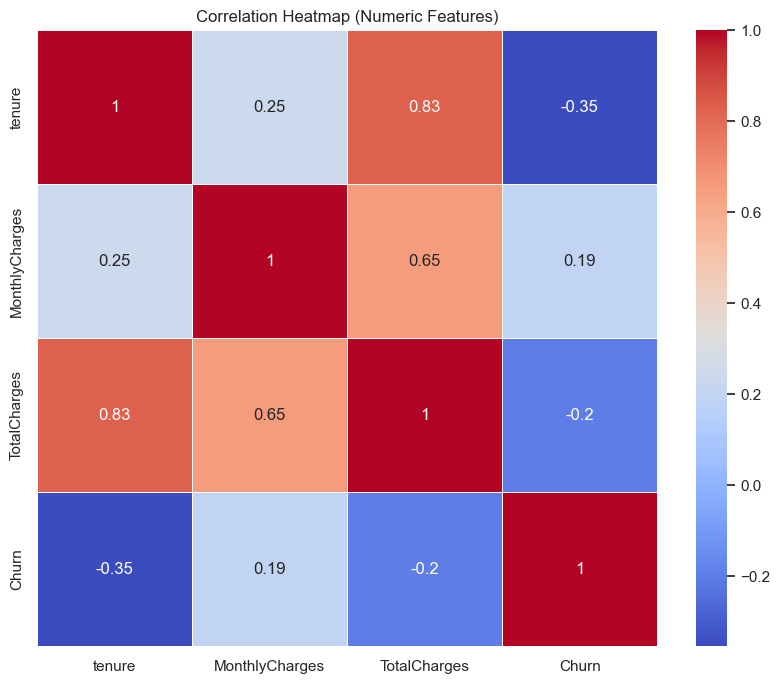

In [36]:
# Correlation Heatmap (numeric features only)
# First encode Churn to numeric (for correlation)
df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df_corr.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

### 4. Statistical Testing

#### 1. Chi-Square Test – Is Churn Dependent on Contract Type?
We used the Chi-Square Test of Independence to check whether churn is related to the customer's contract type.

Hypotheses:
- H₀ (Null): Churn is independent of contract type.
- H₁ (Alternative): Churn is dependent on contract type.

In [39]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Contract'], df['Churn'])

# Run Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")

if p < 0.05:
    print("There is a statistically significant relationship between Contract Type and Churn.")
else:
    print("No significant relationship found between Contract Type and Churn.")


Chi-Square Test Results:
Chi2 Statistic: 1179.55
p-value: 0.0000
There is a statistically significant relationship between Contract Type and Churn.


- Result: If p < 0.05, we reject the null hypothesis.
- Conclusion: There is a statistically significant relationship between Contract Type and Churn. Customers with Month-to-Month contracts are more likely to churn.

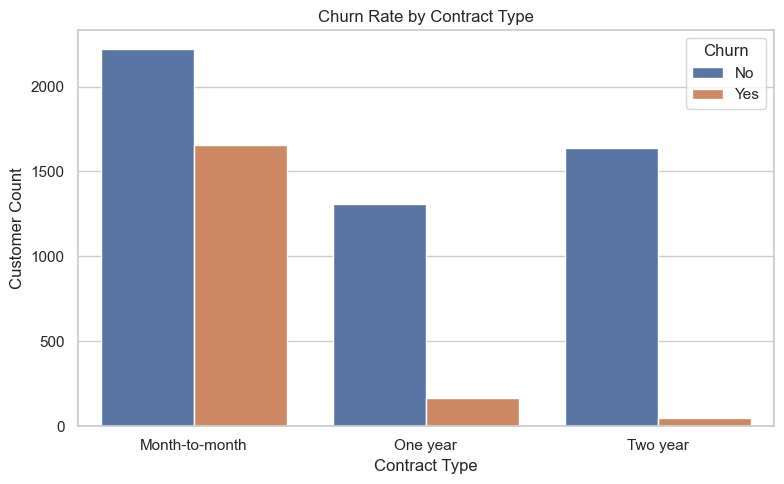

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Customer Count')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- Show the count (or percentage) of churned vs retained customers within each contract type.
- Makes it easy to visually spot differences in churn rates across contract types.
- Highlights which contract group is more likely to churn.

#### 2. T-Test – Do Monthly Charges Differ by Churn Status?
We used an Independent Samples T-Test to compare the average monthly charges between customers who churned vs. those who didn’t.

Hypotheses:
- H₀ (Null): There is no difference in average monthly charges between the two groups.
- H₁ (Alternative): There is a difference in average monthly charges.

In [40]:
from scipy.stats import ttest_ind

# Divide the data into two groups
churn_yes = df[df['Churn'] == 'Yes']['MonthlyCharges']
churn_no = df[df['Churn'] == 'No']['MonthlyCharges']

# Run Welch's T-Test (unequal variances)
t_stat, p_val = ttest_ind(churn_yes, churn_no, equal_var=False)

print("\nT-Test Results")
print(f"T-statistic: {t_stat:.2f}")
print(f"p-value: {p_val:.4f}")

if p_val < 0.05:
    print("Significant: Monthly charges differ between churned and retained customers.")
else:
    print("Not Significant: No difference in monthly charges.")


T-Test Results
T-statistic: 18.34
p-value: 0.0000
Significant: Monthly charges differ between churned and retained customers.


- Result: If p < 0.05, we reject the null hypothesis.
- Conclusion: Customers who churned had significantly higher monthly charges on average

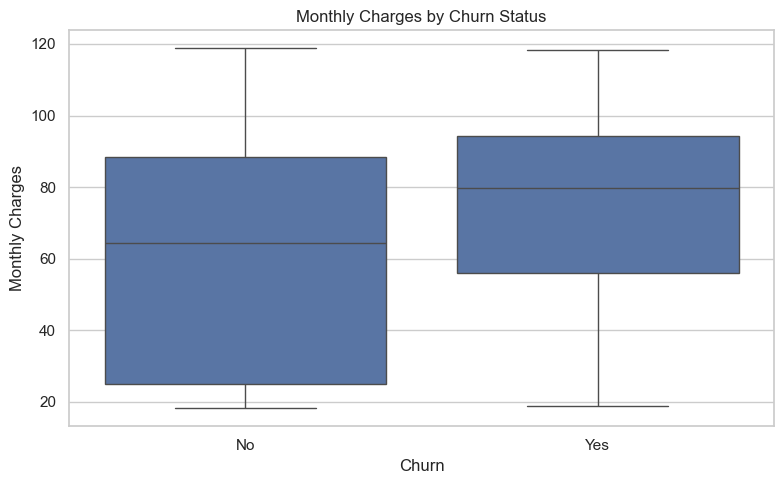

In [47]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.tight_layout()
plt.show()

- Show the distribution of MonthlyCharges for churned vs. non-churned customers.
- Shows spread, median, and outliers in each group.
- Supports your T-test result by visually confirming that churned customers generally have higher charges.

### 5. ML: Predictive Modeling
Goal: To build machine learning models that can predict which customers are likely to churn based on their features. We use a variety of classification algorithms and compare their performance using multiple evaluation metrics.

Models Used:

We selected a mix of simple and complex classifiers:
- Logistic Regression (baseline model)
- Decision Tree
- Random Forest
- K-Nearest Neighbors(KNN)
- Voting Classifier (ensemble of the best models)

Evaluation Metrics:

To evaluate model performance, we used:
- Accuracy: Overall correctness of predictions
- Precision: How many predicted churns were correct
- Recall: How many actual churns were correctly predicted
- F1-Score: Balance between precision and recall
- ROC-AUC: Ability of the model to distinguish churn vs no churn
- Confusion Matrix: Breakdown of True/False Positives/Negatives

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Encode target variable
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
X = df.drop('Churn', axis=1)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: '1830-GGFNM'